In [5]:
import numpy as np

# Análise Nodal

![](fig/circuito1.png)

$R = \frac{V}{I}$

In [13]:
r =3
n = 2 # 3 nós, sendo 1 nó de referência

# Entrada retirada do Grafo
A =np.array([[-1, 1, 0], [0,-1,1]])

G = np.zeros((r, r))
G[0, 0] = 1/6
G[1,1] = 1/2
G[2, 2] = 1/2


Is = np.zeros((r, 1))
Is[0,0] = 3.75

Vs = np.zeros((r, 1))


# Matrizes
A = np.matrix(A)
G = np.matrix(G)
Vs = np.matrix(Vs)
Is = np.matrix(Is)

#Calculos
Gb = A*G*A.T
E= Gb.I*A*(G*Vs-Is)
V = A.T*E
I = Is + G*(V-Vs)
I

matrix([[2.25],
        [2.25],
        [2.25]])

In [17]:
45/12


3.75

In [15]:
import numpy as np

nN = int(input("Numero de Nós L.I.: "))
nR = int(input("Numero de Ramos: "))
A = np.zeros((nN, nR))

for r in range(nR):
    i = int(input("Nó de partida do ramo %d : " %(r +1)))
    j = int(input("Nó de chegada do ramo %d : " %(r + 1)))
    if ((i != j)and(i>0)):
        A[i - 1, r ] = 1
    if ((i != j)and(j>0)):
        A[j - 1, r] = -1
    
        
A

Numero de Nós L.I.: 2
Numero de Ramos: 4
Nó de partida do ramo 1 : 0
Nó de chegada do ramo 1 : 1
Nó de partida do ramo 2 : 1
Nó de chegada do ramo 2 : 0
Nó de partida do ramo 3 : 1
Nó de chegada do ramo 3 : 2
Nó de partida do ramo 4 : 2
Nó de chegada do ramo 4 : 0


array([[-1.,  1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

In [1]:
import networkx as nx

In [62]:
G = nx.DiGraph()
#G.add_edges_from([[0, 1], [1,0], [1, 2], [2, 0]])
G.add_edge(1, 0, id=1, r=8, vs=0, i_s=0)
G.add_edge(0, 1, id=2, r=4, vs=0, i_s=0)
G.add_edge(1, 2, id=3, r=4, vs=0, i_s=0)
G.add_edge(2, 1, id=4, r=12, vs=0, i_s=0)
G.add_edge(2, 0, id=5, r=1e30, vs=0, i_s=8)

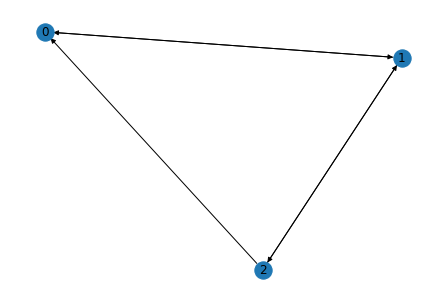

In [63]:
nx.draw(G, with_labels=True)

In [64]:
import numpy as np

nN = G.number_of_nodes() - 1
nR = G.number_of_edges()
A = np.zeros((nN, nR))
G_ = np.zeros((nR, nR))
Is = np.zeros((nR, 1))
Vs = np.zeros((nR, 1))


for r in G.edges:
    nP = r[0]
    nC = r[1]
    i = G[nP][nC]['id']
    #print("Ramo ", i, " (", nP," ,", nC, ")")
    if (nP != 0):
      A[nP-1, i-1 ] = 1.
    if (nC != 0):
      A[nC-1, i-1 ] = -1.
    G_[i-1][i-1]= 1./G[nP][nC]['r']
    Is[i-1, 0] = G[nP][nC]['i_s']
    Vs[i-1, 0] = G[nP][nC]['vs']
    

# Matrizes
A = np.matrix(A)
G_ = np.matrix(G_)
Vs = np.matrix(Vs)
Is = np.matrix(Is)

Gb = A*G_*A.T
print("Gb=",Gb)
E= Gb.I*A*(G_*Vs-Is)
print("E=", E)
V = A.T*E
print("V=", V)
I = Is + G_*(V-Vs)
print("I=", I)


Gb= [[ 0.70833333 -0.33333333]
 [-0.33333333  0.33333333]]
E= [[-21.33333333]
 [-45.33333333]]
V= [[-21.33333333]
 [ 21.33333333]
 [ 24.        ]
 [-24.        ]
 [-45.33333333]]
I= [[-2.66666667]
 [ 5.33333333]
 [ 6.        ]
 [-2.        ]
 [ 8.        ]]


![](fig/ramo_k.png)


Em um ramo k:

$i_k = i_{sk} + g_k*(v - v_{sk})$

Todos os ramos do circuito:

$I = I_S + G*(V - V_S)$

Multiplicando ambos os membros da igualdade pela Matriz A:

$A*I = A*I_S + A*G*V - A*G*V_S$

Considerando, A*I = 0 (LKC) e $v = A^t*E$:

$0 = A*I_S + A*G*A^t*E - A*G*V_S$

$A*G*A^t*E = A*G*V_S-A*I_S$

$G_{barra}*E = A*(G*V_S -I_S)$

![](fig/Circuito-Grafo-01.png)

In [1]:
import networkx as nx

Grafo = nx.DiGraph()

Grafo.add_edge(0, 1, id=1,r=7, vs=0, i_s=16)
Grafo.add_edge(1, 2, id=2, r=1e-30, vs=-2, i_s=0)
Grafo.add_edge(2, 3, id=3, r=2, vs=0, i_s=0)
Grafo.add_edge(2, 0, id=4, r=6, vs=0, i_s=0)
Grafo.add_edge(3, 0, id=5, r=4, vs=8, i_s=0)
Grafo.add_edge(0, 3, id=6, r=2, vs=-6, i_s=0)

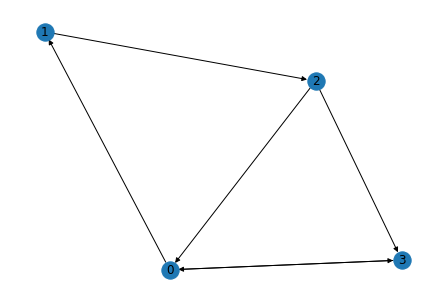

In [2]:
nx.draw(Grafo, with_labels=True)

In [3]:
import numpy as np

nN = Grafo.number_of_nodes() - 1
nR = Grafo.number_of_edges()

A = np.zeros((nN, nR))
G = np.zeros((nR, nR))
Is = np.zeros((nR, 1))
Vs = np.zeros((nR, 1))


for r in Grafo.edges:
    nP = r[0]
    nC = r[1]
    i = Grafo[nP][nC]['id']
    #print("Ramo ", i, " (", nP," ,", nC, ")")
    if (nP != 0):
      A[nP-1, i-1 ] = 1.
    if (nC != 0):
      A[nC-1, i-1 ] = -1.
    G[i-1][i-1]= 1./Grafo[nP][nC]['r']
    Is[i-1, 0] = Grafo[nP][nC]['i_s']
    Vs[i-1, 0] = Grafo[nP][nC]['vs']
    


# Matrizes
A = np.matrix(A, dtype=np.float64)
G = np.matrix(G, dtype=np.float64)
Vs = np.matrix(Vs, dtype=np.float64)
Is = np.matrix(Is, dtype=np.float64)

print("\nEntrada \n", "**************************************************")
print("\nA \n", A)
print("\nG \n", G)
print("\nVs \n", Vs)
print("\nIs \n", Is)

Gb = A*G*A.T
In = A*(G*Vs - Is)
E = (Gb.I)*In
V = A.T*E
I = Is + G*(V - Vs)


print("\nSaída \n", "**************************************************")
print("\nCondutâncias de barras \n", Gb)
print("\nCorrente Independente Resultante no Nó \n", In)
print("\nTensão de Nó \n", E)
print("\nTensão de ramo \n", V)
print("\nCorrente de ramo \n", I)






Entrada 
 **************************************************

A 
 [[-1.  1.  0.  0.  0.  0.]
 [ 0. -1.  1.  1.  0.  0.]
 [ 0.  0. -1.  0.  1. -1.]]

G 
 [[1.42857143e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+30 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.00000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.66666667e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.50000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.00000000e-01]]

Vs 
 [[ 0.]
 [-2.]
 [ 0.]
 [ 0.]
 [ 8.]
 [-6.]]

Is 
 [[16.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Saída 
 **************************************************

Condutâncias de barras 
 [[ 1.00e+30 -1.00e+30  0.00e+00]
 [-1.00e+30  1.00e+30 -5.00e-01]
 [ 0.00e+00 -5.00e-01  1.

In [35]:
Gb

matrix([[ 1.00e+30, -1.00e+30,  0.00e+00],
        [-1.00e+30,  1.00e+30, -5.00e-01],
        [ 0.00e+00, -5.00e-01,  1.25e+00]])

In [36]:
Gb.I

matrix([[-5., -5., -2.],
        [-5., -5., -2.],
        [-2., -2., -0.]])

In [37]:
Inv = np.linalg.inv(Gb)

In [38]:
Inv

matrix([[-5., -5., -2.],
        [-5., -5., -2.],
        [-2., -2., -0.]])

In [56]:
G_[0,0]

0.14285714285714285

In [58]:
G_[3,3]

0.16666666666666666

![](fig/Circuito-Grafo-02.png)


In [68]:
import networkx as nx

G = nx.DiGraph()

G.add_edge(0, 1, id=1,r=12, vs=-45, i_s=0)
G.add_edge(1, 0, id=2, r=12, vs=0, i_s=0)
G.add_edge(1, 2, id=3, r=6, vs=0, i_s=0)
G.add_edge(2, 1, id=4, r=3, vs=0, i_s=0)
G.add_edge(2, 0, id=5, r=6, vs=0, i_s=0)
G.add_edge(0, 2, id=6, r=3, vs=0, i_s=0)

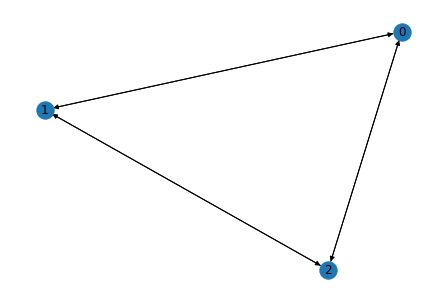

In [69]:
nx.draw(G, with_labels=True)

In [70]:
import numpy as np

nN = G.number_of_nodes() - 1
nR = G.number_of_edges()
A = np.zeros((nN, nR))
G_ = np.zeros((nR, nR))
Is = np.zeros((nR, 1))
Vs = np.zeros((nR, 1))


for r in G.edges:
    nP = r[0]
    nC = r[1]
    i = G[nP][nC]['id']
    #print("Ramo ", i, " (", nP," ,", nC, ")")
    if (nP != 0):
      A[nP-1, i-1 ] = 1.
    if (nC != 0):
      A[nC-1, i-1 ] = -1.
    G_[i-1][i-1]= 1./G[nP][nC]['r']
    Is[i-1, 0] = G[nP][nC]['i_s']
    Vs[i-1, 0] = G[nP][nC]['vs']
    

# Matrizes
A = np.matrix(A)
G_ = np.matrix(G_)
Vs = np.matrix(Vs)
Is = np.matrix(Is)

Gb = A*G_*A.T
print("Gb=",Gb)
E= Gb.I*A*(G_*Vs-Is)
print("E=", E)
V = A.T*E
print("V=", V)
I = Is + G_*(V-Vs)
print("I=", I)

Gb= [[ 0.66666667 -0.5       ]
 [-0.5         1.        ]]
E= [[9. ]
 [4.5]]
V= [[-9. ]
 [ 9. ]
 [ 4.5]
 [-4.5]
 [ 4.5]
 [-4.5]]
I= [[ 3.  ]
 [ 0.75]
 [ 0.75]
 [-1.5 ]
 [ 0.75]
 [-1.5 ]]
